# Carregamento de Bibliotecas

In [1]:
import pandas as pd
import re
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np

No presente projeto, adotou-se o uso da biblioteca **pandas** para a leitura das bases de dados, uma vez que trata-se de uma biblioteca ostensivamente utilizada na comunidade de usuários de Python e que apresenta diversas ferramentas para manipulação e tratamento de conjuntos de ados. Além disso, foi usada a biblioteca **re** para trabalhar com expressões regulares, permitindo realizar buscas eficientes  baseadas em regras específicas  em strings e conjuntos de strings. Outra biblioteca utilizada foi a **sklearn**, tendo sido usada a classe DecisionTreeRegressor para a criação do modelo proposto e a classe tree para gerar diagramas de árvore. A biblioteca **numpy** foi usada por apresentar algumas funções matemáticas simples.

# Tratamento da Base 

In [2]:
amostra_1 = pd.read_csv("./src/datasets/amostra_projeto1.csv",) 
amostra_2= pd.read_csv("./src/datasets/amostra_projeto_2.csv",)
amostra_3 = pd.read_csv("./src/datasets/amostra_projeto_3.csv")
projeto_4 = pd.read_csv("./src/datasets/projeto_4.csv")

In [3]:
amostra_1.head()

,DADOS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Titulo,Projeto 1 - Wa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tipologia,Térrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Área Terreno,"485,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Área Construída,"246,63",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Área Fundação,"237,98",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Assim como pode ser visto acima, as tabelas carregadas estão com a  estrutura comprometida, para corrigir isso será feito o tratamento de seu conteúdo para que seja possível dar prosseguimento a análise dos dados. Uma observação importante é que foi feita uma analise prévia e verificado que ambas as bases apresentam estrutura congruente, portanto, em um peimeiro momento irei sempre apresentar apenas uma das bases para evitar que o documento apresente um grande número de tabelas de forma desnecessária. 

In [4]:
def corrigir_base(df):
    dados = df.loc[0:7].iloc[:,0:2]
    dados.columns = dados.loc[0]
    dados = dados.loc[1:]
    dados.iloc[:,1] = [x.replace(',', '.') for x in  dados.iloc[:,1] ]
    orc = df.loc[10:]
    orc.columns = [i[1] for i in list(orc.loc[10].items())]
    orc = orc.loc[12:]
    c = [j for j in orc.columns if j == j]
    cols_id = [j for j in c if not str.startswith(str(j), "Pre")]
    precos = [j for sub in [(a + "_Unitario", a + "_Total") for a in c if str.startswith(a, "Pre")] for j in sub]
    orc.columns = cols_id + precos
    # Transformando colunas de preços e Quantidade
    orc['Quantidade'] = [x.replace(',', '.') if x == x  else x for x in  orc['Quantidade'] ]
    orc['Quantidade'] = orc['Quantidade'].astype(float)
    for c in precos:
        orc[c] = [x.replace('R$ ', '') if x == x  else x for x in  orc[c]]
        orc[c] = [x.replace('.', '') if x == x  else x for x in  orc[c] ]
        orc[c] = [x.replace(',', '.') if x == x  else x for x in  orc[c] ]
        orc[c] = orc[c].astype(float)
    return (dados, orc)

A função definida acima recebe a base em seu estado bruto e gera duas novas bases, uma com informações gerais do projeto e outra contendo informações acerca do orçamento. Além disso, realiza os seguintes ajustes:
- Remove o R\$ das colunas de preço
- Substitui o separador decimal de "," para "."
- Remove o separador de unidades de milhar
- Converte todas as colunas numéricas para o tipo Float.

In [5]:
d_1, orc_1 = corrigir_base(amostra_1)
d_2, orc_2 = corrigir_base(amostra_2)
d_3, orc_3 = corrigir_base(amostra_3)

In [6]:
d_1

,Titulo,Projeto 1 - Wa
1,Tipologia,Térrea
2,Área Terreno,485.00
3,Área Construída,246.63
4,Área Fundação,237.98
5,Área Fachada,597.88
6,Área Parede,615.86
7,Qtde BWCs,5.00


In [7]:
orc_1.head()

,Item,Referência,Tipo,Código,Descrição,Unid.,Quantidade,BDI,Preço Material_Unitario,Preço Material_Total,Preço Execução_Unitario,Preço Execução_Total,Preço_Unitario,Preço_Total
12,1.,NaN,NaN,NaN,ETAPAS PRE OBRA,NaN,NaN,"0,0%",NaN,NaN,NaN,8086.25,NaN,8086.25
13,1.1.,NaN,NaN,NaN,SONDAGEM,NaN,NaN,"0,0%",NaN,NaN,NaN,3000.00,NaN,3000.00
14,1.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_INF-SON,SONDAGEM,VB,1.0,"0,0%",NaN,NaN,3000.0,3000.00,3000.0,3000.00
15,1.2.,NaN,NaN,NaN,LEVANTAMENTO TOPOGRAFICO,NaN,NaN,"0,0%",NaN,NaN,NaN,1200.00,NaN,1200.00
16,1.2.1,MKS_COMPOSICOES,COMPOSICAO,CMP_INF-LVT,LEVANTAMENTO TOPOGRAFICO,VB,1.0,"0,0%",NaN,NaN,1200.0,1200.00,1200.0,1200.00


Após o tratamento inicial da base, é possível notar que  a estrutura das bases está em um formato mais adequado para futuras análises. 

# Análise Exploratória

In [8]:
orc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 12 to 162
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Item                     151 non-null    object 
 1   Referência               92 non-null     object 
 2   Tipo                     92 non-null     object 
 3   Código                   92 non-null     object 
 4   Descrição                151 non-null    object 
 5   Unid.                    92 non-null     object 
 6   Quantidade               92 non-null     float64
 7   BDI                      151 non-null    object 
 8   Preço Material_Unitario  72 non-null     float64
 9   Preço Material_Total     117 non-null    float64
 10  Preço Execução_Unitario  65 non-null     float64
 11  Preço Execução_Total     119 non-null    float64
 12  Preço_Unitario           92 non-null     float64
 13  Preço_Total              151 non-null    float64
dtypes: float64(7), object(7)


In [9]:
orc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 12 to 172
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Item                     161 non-null    object 
 1   Referência               98 non-null     object 
 2   Tipo                     98 non-null     object 
 3   Código                   98 non-null     object 
 4   Descrição                161 non-null    object 
 5   Unid.                    98 non-null     object 
 6   Quantidade               98 non-null     float64
 7   BDI                      161 non-null    object 
 8   Preço Material_Unitario  78 non-null     float64
 9   Preço Material_Total     128 non-null    float64
 10  Preço Execução_Unitario  72 non-null     float64
 11  Preço Execução_Total     128 non-null    float64
 12  Preço_Unitario           98 non-null     float64
 13  Preço_Total              161 non-null    float64
dtypes: float64(7), object(7)


In [10]:
orc_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 12 to 167
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Item                     156 non-null    object 
 1   Referência               90 non-null     object 
 2   Tipo                     90 non-null     object 
 3   Código                   90 non-null     object 
 4   Descrição                156 non-null    object 
 5   Unid.                    90 non-null     object 
 6   Quantidade               90 non-null     float64
 7   BDI                      156 non-null    object 
 8   Preço Material_Unitario  70 non-null     float64
 9   Preço Material_Total     122 non-null    float64
 10  Preço Execução_Unitario  71 non-null     float64
 11  Preço Execução_Total     130 non-null    float64
 12  Preço_Unitario           90 non-null     float64
 13  Preço_Total              156 non-null    float64
dtypes: float64(7), object(7)


É possível notar que os orçamentos contém quantidades de itens distintos, ou seja, cada projeto é único. Além disso não há informações relevantes faltantes, o que indica solidez das bases utilizadas.

In [11]:
set(orc_2["Descrição"]) - set(orc_3["Descrição"])

{' ',
 'ALVENARIA DE VEDACAO DE BLOCO CERAMICO 009',
 'CONCRETAGEM DE FUNDACAO DE RADIER COM FIBRA DE ACO',
 'CONCRETAGEM E DESFORMA - LAJE PRE FABRICADA TRELICADA INCLINADA ATE 2 POR CENTO',
 'GUARDA CORPO INOX 110CM',
 'PISO LAMINADO; TONALIDADE CLARA; RODAPE EPS BRANCO; REF. DURAFLOOR',
 'PORCELANATO EXTERNO; 60X60CM; CINZA CLARO; RETIFICADO; ACETINADO; REF. INCEPA; AREA UMIDA; COM IMPERMEABILIZACAO',
 'PORCELANATO MADEIRA NA FACHADA. REF. INCEPA, PP ARBOL CARVALHO, 120X20CM',
 'PORCELANATO; 60X60CM; CINZA CLARO; RETIFICADO; ACETINADO; REF. INCEPA; AREA SECA',
 'PORCELANATO; 60X60CM; CINZA CLARO; RETIFICADO; ACETINADO; REF. INCEPA; AREA UMIDA; COM IMPERMEABILIZACAO',
 'PORTA DE CORRER DE MADEIRA SEMI-OCA; 70X210CM; BRANCA; COM PROTECAO CONTRA UMIDADE',
 'PORTA EM ALUMINIO BRANCO UMA FOLHA DE ABRIR - 60 X 60',
 'PORTA EM ALUMINIO PRETO E VIDRO UMA FOLHA DE ABRIR - 90 X 214',
 'PORTA EXTERNA DE MADEIRA MACICA; 90X210CM; BRANCA; COM FRISOS; COM KIT PUXADOR',
 'PORTAO DE PEDESTRE; ABRIR

Acima foi realizada a operação de diferença entre os conjuntos de descrição do orçamento do Projeto 2 e do Projeto 3. Os resultados acima indicam os itens que foram postos no orçamento do Projeto 2, mas que não foram colocados no Projeto 3. Isso indica, que, ainda que os projetos sejam da mesma tipologia, existem peculiaridades inerentes a cada projeto. Isso é um indicativo de que, no Projeto 4, não será possível gerar um orçamento preciso, uma vez que não há informaçõs sobre as necessidades específicas do mesmo. 

In [12]:
s_itens = [str(i)+"." for i in range(1, 20)]
orc_1_n1 = orc_1.loc[orc_1["Item"].isin(s_itens)]
orc_2_n1 = orc_2.loc[orc_2["Item"].isin(s_itens)]
orc_3_n1 = orc_3.loc[orc_3["Item"].isin(s_itens)]
print(len(orc_1_n1) == len(orc_2_n1) == len(orc_3_n1))

True


O resultado acima indica que ambos os projetos possuem o mesmo número de etapas de realização, o que sinaliza que, ainda que os projetos apresentem específicidades quanto a execução, em um nível de agregação maior, ambos parecem seguir algum critério pré determinado. Uma observação importante que deve ser feita é que, em niveis de granularidade inferiores, esse resultado não é valido. 

Apesar disso, uma abordagem interessante é tentar identificar custos fixos. Uma vez que esse fator será de grande ajuda para a elaboração do modelo final. 

In [13]:
cf = orc_1_n1.merge(orc_2_n1).merge(orc_3_n1)
cf

,Item,Referência,Tipo,Código,Descrição,Unid.,Quantidade,BDI,Preço Material_Unitario,Preço Material_Total,Preço Execução_Unitario,Preço Execução_Total,Preço_Unitario,Preço_Total
0,15.,NaN,NaN,NaN,FINALIZACAO DA OBRA,NaN,NaN,"11,6%",NaN,NaN,NaN,1.12,NaN,1.12
1,16.,NaN,NaN,NaN,FORMALIZACAO DA ENTREGA,NaN,NaN,"0,0%",NaN,NaN,NaN,912.85,NaN,912.85


Chegamos a conclusão que, baseado na amostra fornecida,  os itens $15$ e $16$ são custos fixos. 

Um aspecto importante a ser notado é que, apesar dos projetos terem o mesmo número de etapas, isso não significa necessariamente que as etapas serão sempre as mesmas. A seguir será verificada a hipótese das estapas serem as mesmas:

In [14]:
set(orc_2_n1["Descrição"]) - ( set(orc_1_n1["Descrição"]))  | set(orc_1_n1["Descrição"]) - ( set(orc_2_n1["Descrição"])) 

{' ', 'ETAPAS PRE OBRA'}

In [15]:
set(orc_3_n1["Descrição"]) - ( set(orc_1_n1["Descrição"]))  | set(orc_1_n1["Descrição"]) - ( set(orc_3_n1["Descrição"])) 

set()

In [16]:
set(orc_3_n1["Descrição"]) - ( set(orc_2_n1["Descrição"]))  | set(orc_2_n1["Descrição"]) - ( set(orc_3_n1["Descrição"])) 

{' ', 'ETAPAS PRE OBRA'}

Os resultados acima mostram que as etapas para os três projetos da amostra são as mesmas. No entanto, nota-se a ausência do termo "ETAPAS PRE OBRA" na descrição do item 1 do Projeto 2, o que foi assumido como um erro de inserção na hora da criação da base. 

A partir de agora, será criada uma tabela contendo todas as subetapas comuns à ambos os projetos. A ideia é aplicar essa base no modelo que será definido a seguir. Foi decidido trabalhar com a base no nível menos agregado, diferentemente da etapa de custo fixo. Essa decisão se deve ao fato de que, ao escolher trabalhar em um nível mais agregado, algumas covariáveis seriam perdidas, como por exemplo quantidade.

Assim como testado anteriormente para o caso das etapas de forma agregada. Uma hipótese que será verificada é se os projetos de tipologia Sobrado apresentam alguma subetapa diferente dos de tipologia Térrea. O objetivo principal é tentar traçar elementos que possam apresentar algum padrão para que possamos replicar no Projeto 4. 

Para isso, será feita a redução das bases para que todas contenham as mesmas subetapas. Essa decisão incorrerá na perda de informações, no entanto, no cenário atual parece ser uma decisão parcimoniosa, uma vez que não temos acesso à todos os elementos que devem estar presentes no Projeto 4. 

In [17]:
sub_itens_1 = [i for i in orc_1["Item"] if bool(re.findall(r"\d+.\d+.\d+", i))]
orc_1_sub = orc_1.loc[orc_1["Item"].isin(sub_itens_1)]
sub_itens_2 = [i for i in orc_2["Item"] if bool(re.findall(r"\d+.\d+.\d+", i))]
orc_2_sub = orc_2.loc[orc_2["Item"].isin(sub_itens_2)]
sub_itens_3 = [i for i in orc_3["Item"] if bool(re.findall(r"\d+.\d+.\d+", i))]
orc_3_sub = orc_3.loc[orc_3["Item"].isin(sub_itens_3)]

Para fins de consistência, será feita a verificação se existem elementos que aparecem mais de uma vez.

In [18]:
len(list(orc_1_sub["Descrição"])) == len(set(orc_1_sub["Descrição"]))

False

In [19]:
len(list(orc_2_sub["Descrição"])) == len(set(orc_2_sub["Descrição"]))

False

In [20]:
len(list(orc_3_sub["Descrição"])) == len(set(orc_3_sub["Descrição"]))

False

In [21]:
orc_3_sub["Descrição"].value_counts().head()

Descrição
ESQUADRIA METALICA - JANELA LINHA 32 PRETA COM VIDRO LISO POR METRO QUADRADO    5
CALHAS E RUFOS COM PINTURA ELETROSTATICA COR BRANCO                             2
TEXTURA PROJETADA COR MARROM CLARO                                              2
REVESTIMENTO DE ESCADA DE GRANITO TONALIDADE CLARA                              2
RESTANTE REBOCO INTERNO                                                         2
Name: count, dtype: int64

Como pode ser visto no exemplo acima, o item **ESQUADRIA METALICA - JANELA LINHA 32 PRETA COM VIDRO LISO POR METRO QUADRADO** aparece 5 vezes no Projeto 5.  

De maneira geral, em todas as amostras existe pelo menos um elemento que aparece duas vezes, o que acaba por criar inconsitência para o futuro modelo. Para resolver isso, serão criadas novas bases agrupadas pela colunas descrição. Nessa etapa, também foi decidido que algumas colunas da base não serão necessárias. Abaixo são apresentadas as colunas selecionadas 

In [22]:
cols_selecionadas = ["Quantidade", "Preço_Total"]

Foi decidido manter apenas as colunas de Preço Total e Quantidade. Uma vez que as demais colunas de preço estão correlacionadas com a de Preço_Total e para a criação do modelo precisamos de apenas uma variável resposta, nesse caso, se fossem mantidas as demais colunas de preço, incorreriamos em um modelo sobreajustado. 

In [23]:
orc_1_sub_g = orc_1_sub.groupby(["Descrição"])[cols_selecionadas].sum().reset_index()
orc_2_sub_g = orc_2_sub.groupby(["Descrição"])[cols_selecionadas].sum().reset_index()
orc_3_sub_g = orc_3_sub.groupby(["Descrição"])[cols_selecionadas].sum().reset_index()

Abaixo é apresentada a amostra depois do agrupamento. 

In [24]:
orc_1_sub_g

,Descrição,Quantidade,Preço_Total
0,ACABAMENTOS ELETRICOS - PADRAO ALTO,247.00,9484.80
1,ACABAMENTOS HIDROSSANITARIOS NA COZINHA E AREA...,1.00,680.00
2,ACABAMENTOS HIDROSSANITARIOS NOS BANHEIROS - P...,5.00,26725.00
3,ALCAPAO METALICO BRANCO 60X60,1.00,150.26
4,ALVENARIA DE VEDACAO DE BLOCO CERAMICO 009,485.92,95519.63
...,...,...,...
68,TAXA RRT,1.00,108.69
69,TAXA VISTORIA CONCESSIONARIA DE AGUA,1.00,260.00
70,TEXTURA PROJETADA COR CINZA CLARO,597.88,22099.44
71,TEXTURA ROLADA PARA MURO - BRANCA,411.87,12371.34


Não parece haver uma rigorosidade em relação à coluna Item, uma vez que as amostras apresentam o mesmo item se referindo a objetos distintos, nesse sentido optou-se por removê-la, da mesma forma, as colunas Tipo, Código e Referência não parecem agregar valor informativo à base. Assumiu-se que a coluna BDI estava relacionada a despesas indiretas, como a mesma apenas apresenta valor não-nulo para os itens assumidos como custo fixo, optou-se também por removê-la.

Uma hipótese inicial que pode ser levantada é a possibilidade de existência de uma estrutura específica para cada tipologia, ou seja, que a estrutura do orçamento seja definida primariamente pela tipologia.

In [25]:
set(orc_2_sub_g["Descrição"]) - set(orc_1_sub_g["Descrição"]) | set(orc_2_sub_g["Descrição"]) - set(orc_1_sub_g["Descrição"]) 

{'CALCADA INTERNA DE CONCREGRAMA',
 'CHURRASQUEIRA PRE MOLDADA DE CONCRETO',
 'CONCRETAGEM DE FUNDACAO DE RADIER COM FIBRA DE ACO',
 'CONCRETAGEM E DESFORMA - VIGA DE BORDO; 20X40CM',
 'ESTRUTURA DE TELHADO PARA SOBRADO COM FIBROCIMENTO',
 'GUARDA CORPO INOX 110CM',
 'PISO LAMINADO; TONALIDADE CLARA; RODAPE EPS BRANCO; REF. DURAFLOOR',
 'PORCELANATO MADEIRA NA FACHADA. REF. INCEPA, PP ARBOL CARVALHO, 120X20CM',
 'PORCELANATO; 60X60CM; CINZA CLARO; RETIFICADO; ACETINADO; REF. INCEPA; AREA SECA',
 'PORCELANATO; 60X60CM; CINZA CLARO; RETIFICADO; ACETINADO; REF. INCEPA; AREA UMIDA; COM IMPERMEABILIZACAO',
 'PORTA DE CORRER DE MADEIRA SEMI-OCA; 70X210CM; BRANCA; COM PROTECAO CONTRA UMIDADE',
 'PORTA EM ALUMINIO BRANCO UMA FOLHA DE ABRIR - 60 X 60',
 'PORTA EM ALUMINIO PRETO E VIDRO UMA FOLHA DE ABRIR - 90 X 214',
 'PORTA INTERNA DE MADEIRA SEMI-OCA; 80X210CM; BRANCA',
 'PORTAO DE PEDESTRE; ABRIR; H2,2M',
 'PORTAO DE VEICULO BASCULANTE 4,2M H2,4M',
 'REVESTIMENTO CERAMICO DE PAREDE; 60X60CM;

In [26]:
set(orc_3_sub["Descrição"]) - set(orc_2_sub["Descrição"]) |  set(orc_2_sub["Descrição"]) - set(orc_3_sub["Descrição"]) 

{'ALVENARIA DE VEDACAO DE BLOCO CERAMICO 009',
 'ATERRO',
 'CALCADA EM DECK DE MADEIRA',
 'CALCADA INTERNA DE CONCRETO VASSOURADO',
 'CONCRETAGEM DE FUNDACAO DE RADIER COM FIBRA DE ACO',
 'CONCRETAGEM DE FUNDACAO DE RADIER COM TELA DE ACO',
 'CONCRETAGEM E DESFORMA - LAJE PRE FABRICADA TRELICADA INCLINADA ATE 2 POR CENTO',
 'ESQUADRIA METALICA - PORTA JANELA LINHA 32 PRETA COM VIDRO LISO POR METRO QUADRADO',
 'GUARDA CORPO INOX 110CM',
 'GUARDA CORPO VIDRO ',
 'IMPERMEABILIZACAO DE LAJE',
 'PEDRA SAO TOME BRANCA 15X15CM NA FACHADA',
 'PILAR CIRCULAR EM CONCRETO DIAMETRO 40 CM',
 'PISCINA GRANDE H1,60 EM CONCRETO ARMADO IMPERMEABILIZADA COM PASTILHAS SEM EQUIPAMENTOS',
 'PISO LAMINADO; TONALIDADE CLARA; RODAPE EPS BRANCO; REF. DURAFLOOR',
 'PISO LAMINADO; TONALIDADE ESCURA; RODAPE EPS BRANCO; REF. DURAFLOOR',
 'PORCELANATO EXTERNO; 60X60CM; BEGE CLARO; RETIFICADO; ACETINADO; REF. INCEPA',
 'PORCELANATO EXTERNO; 60X60CM; CINZA CLARO; RETIFICADO; ACETINADO; REF. INCEPA; AREA UMIDA; COM IM

In [27]:
set(orc_3_sub["Descrição"]) - set(orc_1_sub["Descrição"]) |  set(orc_1_sub["Descrição"]) - set(orc_3_sub["Descrição"])  

{'ALVENARIA DE VEDACAO DE BLOCO CERAMICO 009',
 'CALCADA EM DECK DE MADEIRA',
 'CALCADA INTERNA DE CONCREGRAMA',
 'CALCADA INTERNA DE CONCRETO DESEMPENADO',
 'CHURRASQUEIRA PRE MOLDADA DE CONCRETO',
 'CONCRETAGEM E DESFORMA - LAJE PRE FABRICADA TRELICADA INCLINADA ATE 2 POR CENTO',
 'CONCRETAGEM E DESFORMA - VIGA DE BORDO; 20X40CM',
 'ESTRUTURA DE TELHADO PARA CASA TERREA COM FIBROCIMENTO',
 'ESTRUTURA DE TELHADO PARA SOBRADO COM FIBROCIMENTO',
 'GUARDA CORPO VIDRO ',
 'IMPERMEABILIZACAO DE LAJE',
 'JANELA EM ALUMINIO PRETO UMA FOLHA MAXIM-AIR MINI BOREAL 80 X 78',
 'MUDA DE IPE',
 'MURO DE CONTENCAO DE BLOCO APARENTE; H1,8M',
 'PEDRA SAO TOME BRANCA 15X15CM NA FACHADA',
 'PILAR CIRCULAR EM CONCRETO DIAMETRO 40 CM',
 'PISO LAMINADO; TONALIDADE ESCURA; RODAPE EPS BRANCO; REF. DURAFLOOR',
 'PORCELANATO EXTERNO; 60X60CM; BEGE CLARO; RETIFICADO; ACETINADO; REF. INCEPA',
 'PORCELANATO EXTERNO; 60X60CM; CINZA CLARO; RETIFICADO; ACETINADO; REF. INCEPA; AREA UMIDA; COM IMPERMEABILIZACAO',
 'PO

Como pode ser visto acima, não parece haver evidências de que projetos da tipologia sobrado apresentam elementos epecíficos quando comparados ao projeto da tipologia Térrea. É importante ressaltar que essa análise desconsidera todas as demais variáveis que poderiam afetar a presença e ausência de elementos. Apesar disso, devido ao Projeto 4 apresentar tipologia Sobrado, adotou-se as amostras 2 e 3 como referência e o processo de estimação do orçamento para o Projeto 4 se dará da seguinte forma:

- $M(X_1, X_2, X_3)$ caso o item analisado esteja presente nas três amostras.
- $M(X_2, X_3)$ caso o item analisado esteja presente apenas nas amostras $3$ e $2$.
- $M(X_2)$ caso o item analisado esteja presente apenas na amostra $2$.
- $M(X_3)$ caso o item analisado esteja presente apenas na amostra $3$.

Em que, $M$ é o modelo que será definido na seção seguinte e $X_i, i\in \{1,2,3\}$ representa o conjunto de covariáveis referentes ao elemento analisado do projeto $i$. De forma a simplificada a intuição por trás da regra acima é apresentado no exemplo abaixo: 

Tomemos como exemplo o item **CONSUMO DE AGUA DURANTE A OBRA**, esse elemento está presente nos três projetos de amostra, logo a saída da estimativa para o Projeto 4 será dada por:$$M(X_1, X_2, X_3)$$


Onde cada $X_i$ representa o vetor definido da seguinte forma: $X_i = (\text{Tipologia}_i, \text{Area Terreno}_i, \text{Area Construída}_i, \text{Area Fundacao}_i, \text{Area Fachada}_i, \text{Area Parede}_i, \text{Qtde BWCs}_i, \text{Quantidade}_i), \forall i \in \{1,2,3\}$ 

Agora tomemos o item **CONCRETAGEM E DESFORMA - VIGA DE BORDO; 20X40CM**, esse elemento está presente nos projetos $2$ e $3$, mas não está presente no projeto $1$, nesse caso a estimativa desse item para o Projeto 4 será dada por:
$$M(X_2, X_3)$$


De fato, a abordagem proposta acima indica Superestimação do custo, uma vez o conjunto de elementos presentes no orçamento do Projeto 4 será dado por: $$\left(\cap_{i=1}^{3}E_i\right) \cup (E_2\cap E_3 \cap E_1^c) \cup (E_2 \cap E_3^c \cap E_1^c) \cup (E_3 \cap E_2^c \cap E_1^c)$$ 

Onde $E_i$ representa o número de elementos no orçamento do projeto $i$, com $i \in \{1,2,3\}$ 

A partr de agora será feita a criação de cada uma das três bases de acordo com o critério definido acima. 

In [28]:
inter_1_2_3 = set(orc_1_sub_g["Descrição"]).intersection(set(orc_2_sub_g["Descrição"])).intersection(set(orc_3_sub_g["Descrição"]))
inter_2_3_1c = set(orc_2_sub_g["Descrição"]).intersection(set(orc_3_sub_g["Descrição"])) - set(orc_1_sub_g["Descrição"])
inter_2_3c_1c = set(orc_2_sub_g["Descrição"]) - set(orc_3_sub_g["Descrição"]) - set(orc_1_sub_g["Descrição"])
inter_3_2c_1c = set(orc_3_sub_g["Descrição"]) - set(orc_2_sub_g["Descrição"]) - set(orc_1_sub_g["Descrição"])

Agora que já temos os conjuntos criados, será feita uma transformação nas bases contendo informações do projeto, ou seja, nas bases que não são de orçamento. 

Também será feita a transformação do tipo da coluna Tipologia para numérica, uma vez que o modelo que será definido exige que todas as colunas utilizadas sejam numéricas. Nesse sentido, adotou-se a seguinte definição:

In [29]:
cat_tipologia = {
    "Térrea" : 0, 
    "Sobrado" : 1
                }

In [30]:
def transform_p(df):
    df = df.T.reset_index(drop=True)
    df.columns = df.loc[0]
    df = df.loc[1:]
    df["Tipologia"] = cat_tipologia[df["Tipologia"].iloc[0]]
    return df

In [31]:
d_1_t = transform_p(d_1)
d_2_t = transform_p(d_2)
d_3_t = transform_p(d_3)

In [32]:
d_1_t

,Tipologia,Área Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
1,0,485.00,246.63,237.98,597.88,615.86,5.00


Como pode ser visto acima, a partir de agora temos as informações do projeto em uma única linha, o que será necessário para a aplicação do modelo final. A seguir será feita a preparação da base para modelagem e em seguida feita a modelagem e apresentação dos resultados. 

In [33]:
df_p_projeto_4_1 = {} # E1∩E2∩E3
df_p_projeto_4_2 = {} # E2∩E3∩C(E3)
df_p_projeto_4_3 = {} # E2∩C(E3)∩C(E1)
df_p_projeto_4_4 = {} # E3∩C(E2)∩C(E1)

cols_selecionadas = ["Quantidade", "Preço_Total"]

for i in inter_1_2_3:
    orc_1_f = orc_1_sub_g.loc[(orc_1_sub_g["Descrição"] == i)]
    orc_2_f = orc_2_sub_g.loc[(orc_2_sub_g["Descrição"] == i)]
    orc_3_f = orc_3_sub_g.loc[(orc_3_sub_g["Descrição"] == i)]
    
    molde_1 = d_1_t.copy()
    molde_2 = d_2_t.copy()
    molde_3 = d_3_t.copy()
    #molde.insert(0, "Descrição", orc_2_f["Descrição"].item()) 
    for c in cols_selecionadas:
        if orc_1_f.iloc[0][c] == orc_1_f.iloc[0][c]: # Elimina NaN
            molde_1[c] = orc_1_f.iloc[0][c]
        if orc_2_f.iloc[0][c] == orc_2_f.iloc[0][c]: 
            molde_2[c] = orc_2_f.iloc[0][c]
        if orc_3_f.iloc[0][c] == orc_3_f.iloc[0][c]: 
            molde_3[c] = orc_3_f.iloc[0][c]
    df_p_projeto_4_1[orc_2_f["Descrição"].item()] = pd.concat([molde_1, molde_2, molde_3])

for i in inter_2_3_1c:
    orc_2_f = orc_2_sub_g.loc[(orc_2_sub_g["Descrição"] == i)]
    orc_3_f = orc_3_sub_g.loc[(orc_3_sub_g["Descrição"] == i)]
    
    molde_2 = d_2_t.copy()
    molde_3 = d_3_t.copy()
    #molde.insert(0, "Descrição", orc_2_f["Descrição"].item()) 
    for c in cols_selecionadas:
        if orc_2_f.iloc[0][c] == orc_2_f.iloc[0][c]: 
            molde_2[c] = orc_2_f.iloc[0][c]
        if orc_3_f.iloc[0][c] == orc_3_f.iloc[0][c]: 
            molde_3[c] = orc_3_f.iloc[0][c]
    df_p_projeto_4_2[orc_2_f["Descrição"].item()] = pd.concat([molde_2, molde_3])
    
for i in inter_2_3c_1c:
    orc_2_f = orc_2_sub_g.loc[(orc_2_sub_g["Descrição"] == i)]
    molde = d_2_t.copy()
    #molde.insert(0, "Descrição", orc_2_f["Descrição"].item()) 
    for c in cols_selecionadas:
        if orc_2_f.iloc[0][c] == orc_2_f.iloc[0][c]: # Elimina NaN
            molde[c] = orc_2_f.iloc[0][c]
    df_p_projeto_4_3[orc_2_f["Descrição"].item()] = molde

for i in inter_3_2c_1c:
    orc_3_f = orc_3_sub_g.loc[(orc_3_sub_g["Descrição"] == i)]
    molde = d_3_t.copy()
    #molde.insert(0, "Descrição", orc_2_f["Descrição"].item()) 
    for c in cols_selecionadas:
        if orc_3_f.iloc[0][c] == orc_3_f.iloc[0][c]: # Elimina NaN
            molde[c] = orc_3_f.iloc[0][c]
    df_p_projeto_4_4[orc_2_f["Descrição"].item()] = molde

O codigo acima cria 4 conjuntos de dados distintos, a seguir é apresentada uma breve descrição de cada uma delas:

- **df_p_projeto_4_1** : Dicionário contendo informações de elementos comuns às 3 bases amostrais. 
- **df_p_projeto_4_2** : Dicionário contendo informações de elementos comuns às bases dos projetos 2 e 3 que não estão presentes no Projeto 1. 
- **df_p_projeto_4_3** :  Dicionário contendo informações de elementos presentes na base do projeto 2  que não estão presentes nas bases do Projeto 1 e 3. 
- **df_p_projeto_4_4** : Dicionário contendo informações de elementos presentes na base do projeto 3  que não estão presentes nas bases do Projeto 1 e 2. 

# Modelagem

Uma das limitações evidentes do presente desafio é o fato de estarmos lidando com um problema com amostra de tamanho pequeno, o que acaba limitando a possibilidade de uso de modelos estatísticos. Apesar de limitar, isso não significa que seja impossível, ainda existe a possibilidade de uso de técnicas de reamostragem ou modelos que consigam enfrentar tal problema. Uma possibilidade latente é o uso de algum aproximador universal de função para estabelecer ligação entre os dados e o orçamento, entretanto, como pode ser visto em Shwartz-Ziv e Armon (2022), para dados tabulares, que é exatamente a estrutura na qual estamos trabalhando, o uso de tal aproximação não se mostra efeitva. Ainda em relação ao artigo supracitado, os autores reforçam a ideia de que modelos baseados em árvores são mais indicados para esse tipo de dado, nesse sentido, optou-se por utilizar árvores de regressão. 


O modelo proposto será definido da seguinte forma:
$$ M(X) =  \begin{cases}
X & \text{se} &|X| = 1\\
AD(X) & \text{se} &|X| > 1\\             
\end{cases}$$

Em que $|X|$ representa o número de elementos no conjunto $X$

Ou seja, o modelo assume a função identidade caso a base contenha apenas uma linha, isto é, o modelo replica a informação do projeto anterior. Caso contrário é usada uma arvore de decisão para estimar o valor do projeto 4. Ademais, segue que a quantidade do item no projeto 4 será definida como:
$$ q_4 =  \begin{cases}
\dfrac{1}{n}\sum_{i=1}^{n} q_i & \text{se}& n \in \{1,2,3\}\\          
\end{cases}$$

Ou seja, para as bases que tiveram mais de duas linhas, a quantidade do item no projeto 4 será estimada pela média ou simplesmente replicado, caso tenha apenas uma linha. 

Para o uso de árvores de regressão optou-se por usar a biblioteca sklearn, uma vez que trata-se de uma biblioteca bastante utilizada e largamente testada. 

A seguir é apresentado um exeplo de funcionamento do modelo proposto:

Tomemos como exemplo o item **REBOCO DE MURO**.

In [34]:
ex= df_p_projeto_4_1["REBOCO DE MURO"]
ex

,Tipologia,Área Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,Quantidade,Preço_Total
1,0,485.00,246.63,237.98,597.88,615.86,5.00,415.52,16138.80
1,1,300.00,249.24,161.55,747.17,662.06,4.00,224.01,8700.55
1,1,500.00,425.00,378.31,521.67,581.76,6.00,341.63,13268.91


In [35]:
regressor = DecisionTreeRegressor(random_state=25)

In [36]:
regressor.fit(ex.drop(["Preço_Total"], axis=1), ex["Preço_Total"])

DecisionTreeRegressor(random_state=25)

[Text(0.4, 0.8333333333333334, 'x[1] <= 392.5\nsquared_error = 9381527.196\nsamples = 3\nvalue = 12702.753'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 8700.55'),
 Text(0.6, 0.5, 'x[1] <= 492.5\nsquared_error = 2059067.153\nsamples = 2\nvalue = 14703.855'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 16138.8'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 13268.91')]

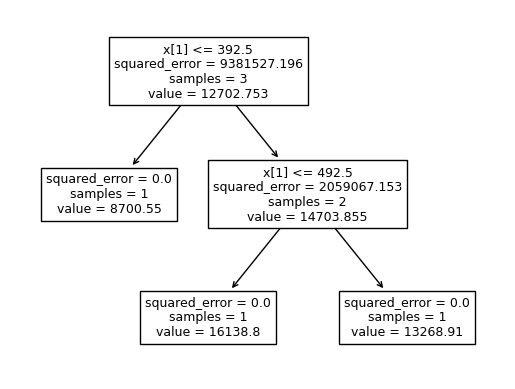

In [37]:
tree.plot_tree(regressor)

A árvore acima nada mais é que sucessivos testes condiconais em que o objetivo final é minimizar o erro quadrático. Nesse exmplo específico temos que, se a variável **Área Terreno** for menor que $392.5$ então o preço total do item **REBOCO DE MURO** será R\\$ 8700,55. Caso contrário e se **Área Terreno**  menor ou igual a $492.5$, então o preço total será de R\\$ 16138,55, caso contrário, será de R\\$ 13268,91. É importante ressaltar que cada elemento terá sua própria árvore, onde o algoritmo decide quais itens considerar baseado na minimização do erro quadrático. Para não extender demasiadamente o texto, serão omitidos os diagramas de árvore para cada item, sendo deixado apenas o exemplo acima como ilustração. 

A seguir será feita a transformação da base do Projeto 4, haja vista que até o momento ela se manteve inalterada.

In [38]:
projeto_4.iloc[:,1] = [x.replace(',', '.') for x in  projeto_4.iloc[:,1] ]
projeto_4_t = transform_p(projeto_4)

projeto_4_t = projeto_4_t.drop("Titulo", axis=1)

Abaixo serão geradas as previsões para cada um dos DataSets criados anteriormente. 

In [39]:
orc_projeto4_1 = []
for i in df_p_projeto_4_1:
    df = df_p_projeto_4_1[i]
    molde = projeto_4_t.copy()
    molde.insert(7, "Quantidade", round(np.mean(df["Quantidade"]),2))
    regressor = DecisionTreeRegressor(random_state=25)
    regressor.fit(df.drop(["Preço_Total"], axis=1), df["Preço_Total"])
    p_total = regressor.predict(molde)
    info = {"Descrição" : i ,
            "Quantidade" : molde["Quantidade"].item(),
           "Preço_Total" : round(p_total.item(), 2) }
    orc_projeto4_1.append(info)

In [40]:
orc_projeto4_1 = pd.DataFrame(orc_projeto4_1)
orc_projeto4_1

,Descrição,Quantidade,Preço_Total
0,INSTALACAO DE TAPUME,88.33,10102.30
1,TEXTURA PROJETADA COR CINZA CLARO,510.60,11489.95
2,SOLEIRAS DE BOX EM GRANITO DE TONALIDADE CLARA,5.48,362.69
3,FORRO DE GESSO EXECUTADO EM OBRA COM TABICA E...,250.40,31728.02
4,LIGACOES ELETRICAS E HIDROSSANITARIAS EM CONDO...,1.00,3500.00
5,"MURO DE BLOCO APARENTE; H2,6M",87.64,85823.29
6,CALCADA DE BLOCO INTERTRAVADO PAVER,26.22,3101.85
7,GRAMA ESMERALDA,113.76,1628.22
8,ESQUADRIA METALICA - JANELA LINHA 32 PRETA COM...,24.02,15584.25
9,TAXA AVERBACAO,1.00,502.85


In [41]:
orc_projeto4_2 = []
for i in df_p_projeto_4_2:
    df = df_p_projeto_4_2[i]
    molde = projeto_4_t.copy()
    molde.insert(7, "Quantidade", round(np.mean(df["Quantidade"]),2))
    regressor = DecisionTreeRegressor(random_state=25)
    regressor.fit(df.drop(["Preço_Total"], axis=1), df["Preço_Total"])
    p_total = regressor.predict(molde)
    info = {"Descrição" : i ,
            "Quantidade" : molde["Quantidade"].item(),
           "Preço_Total" : round(p_total.item(), 2) }
    orc_projeto4_2.append(info)

In [42]:
orc_projeto4_2 = pd.DataFrame(orc_projeto4_2)
orc_projeto4_2

,Descrição,Quantidade,Preço_Total
0,CALCADA INTERNA DE CONCREGRAMA,26.98,3584.08
1,CHURRASQUEIRA PRE MOLDADA DE CONCRETO,1.00,4535.00
2,CONCRETAGEM E DESFORMA - VIGA DE BORDO; 20X40CM,50.25,14108.31
3,ESTRUTURA DE TELHADO PARA SOBRADO COM FIBROCIM...,128.82,29094.62
4,PORTA INTERNA DE MADEIRA SEMI-OCA; 80X210CM; B...,5.50,4922.10
5,REVESTIMENTO DE ESCADA DE GRANITO TONALIDADE C...,9.18,23375.56


In [43]:
orc_projeto4_3 = []
for i in df_p_projeto_4_3:
    df = df_p_projeto_4_3[i]
    molde = projeto_4_t.copy()
    molde.insert(7, "Quantidade", round(np.mean(df["Quantidade"]),2))
    regressor = DecisionTreeRegressor(random_state=25)
    regressor.fit(df.drop(["Preço_Total"], axis=1), df["Preço_Total"])
    p_total = regressor.predict(molde)
    info = {"Descrição" : i ,
            "Quantidade" : molde["Quantidade"].item(),
           "Preço_Total" : round(p_total.item(),2) }
    orc_projeto4_3.append(info)

In [44]:
orc_projeto4_3 = pd.DataFrame(orc_projeto4_3)
orc_projeto4_3

,Descrição,Quantidade,Preço_Total
0,"PORTAO DE VEICULO BASCULANTE 4,2M H2,4M",1.00,13440.00
1,PISO LAMINADO; TONALIDADE CLARA; RODAPE EPS BR...,102.10,13526.76
2,TEXTURA PROJETADA COR CINZA MEDIO,26.40,975.82
3,PORCELANATO; 60X60CM; CINZA CLARO; RETIFICADO;...,29.22,7371.13
4,PORTA DE CORRER DE MADEIRA SEMI-OCA; 70X210CM;...,2.00,170.00
5,GUARDA CORPO INOX 110CM,10.34,19904.50
6,"PORTAO DE PEDESTRE; ABRIR; H2,2M",1.30,2860.00
7,PORCELANATO; 60X60CM; CINZA CLARO; RETIFICADO;...,8.94,1888.58
8,TEXTURA PROJETADA COR CINZA ESCURO,72.55,2681.66
9,PORTA EM ALUMINIO PRETO E VIDRO UMA FOLHA DE A...,2.00,2800.00


In [45]:
orc_projeto4_4 = []
for i in df_p_projeto_4_4:
    df = df_p_projeto_4_4[i]
    molde = projeto_4_t.copy()
    molde.insert(7, "Quantidade", round(np.mean(df["Quantidade"]),2))
    regressor = DecisionTreeRegressor(random_state=25)
    regressor.fit(df.drop(["Preço_Total"], axis=1), df["Preço_Total"])
    p_total = regressor.predict(molde)
    info = {"Descrição" : i ,
            "Quantidade" : molde["Quantidade"].item(),
           "Preço_Total" : round(p_total.item(),2) }
    orc_projeto4_4.append(info)

In [46]:
orc_projeto4_4 = pd.DataFrame(orc_projeto4_4)
orc_projeto4_4

,Descrição,Quantidade,Preço_Total
0,PORTA EM ALUMINIO BRANCO UMA FOLHA DE ABRIR - ...,25.4,20409.66


In [47]:
orc_projeto4 = pd.concat([orc_projeto4_1,orc_projeto4_2,orc_projeto4_3,orc_projeto4_4])

In [48]:
orc_projeto4

,Descrição,Quantidade,Preço_Total
0,INSTALACAO DE TAPUME,88.33,10102.30
1,TEXTURA PROJETADA COR CINZA CLARO,510.60,11489.95
2,SOLEIRAS DE BOX EM GRANITO DE TONALIDADE CLARA,5.48,362.69
3,FORRO DE GESSO EXECUTADO EM OBRA COM TABICA E...,250.40,31728.02
4,LIGACOES ELETRICAS E HIDROSSANITARIAS EM CONDO...,1.00,3500.00
...,...,...,...
10,REVESTIMENTO CERAMICO DE PAREDE; 60X60CM; CINC...,74.32,13433.67
11,"PORCELANATO MADEIRA NA FACHADA. REF. INCEPA, P...",25.14,7496.87
12,CONCRETAGEM DE FUNDACAO DE RADIER COM FIBRA DE...,161.55,34008.49
13,PORTA EM ALUMINIO BRANCO UMA FOLHA DE ABRIR - ...,1.00,540.00


Retomando o custo fixo

In [49]:
orc_projeto4 = pd.concat([orc_projeto4, cf[["Descrição", "Quantidade", "Preço_Total"]]])
orc_projeto4 = orc_projeto4.reset_index(drop=True)
orc_projeto4

,Descrição,Quantidade,Preço_Total
0,INSTALACAO DE TAPUME,88.33,10102.30
1,TEXTURA PROJETADA COR CINZA CLARO,510.60,11489.95
2,SOLEIRAS DE BOX EM GRANITO DE TONALIDADE CLARA,5.48,362.69
3,FORRO DE GESSO EXECUTADO EM OBRA COM TABICA E...,250.40,31728.02
4,LIGACOES ELETRICAS E HIDROSSANITARIAS EM CONDO...,1.00,3500.00
...,...,...,...
71,CONCRETAGEM DE FUNDACAO DE RADIER COM FIBRA DE...,161.55,34008.49
72,PORTA EM ALUMINIO BRANCO UMA FOLHA DE ABRIR - ...,1.00,540.00
73,PORTA EM ALUMINIO BRANCO UMA FOLHA DE ABRIR - ...,25.40,20409.66
74,FINALIZACAO DA OBRA,NaN,1.12


Gerando arquivo com o orçamento final:

In [50]:
orc_projeto4.to_csv("./orcamento_projeto4.csv")

# Conclusão

O presente projeto teve por objetivo produzir uma estimativa do custo para o Projeto 4, dessa forma, é possível afirmar que o objetivo foi atingido. No entanto, algus pontos ainda necessitam ser explorados. Um dos maiores desafios do presente projeto é o fato de terem sido apresentadas apenas três amostras, o que acaba tornando difícil o uso de modelos mais robustos ou que se baseiam em estimativa de funções de aproximação, e até mesmo se tornando impossível verificar validade de pressupostos de alguns modelos estatítsticos clássicos. Nesse sentido, a abordagem apresentada no texto visou explorar o algorítmo de árvore de regressão, uma vez que, de maneira simplificada, o algoritmo funciona como uma espécie de tomador de decisão que consegue tomar decisões olhando para todas as amostras ao mesmo tempo.

Em relação a previsão da incerteza, não foi possível identificar formas de estimar a incerteza das previsões, uma vez que a construção de intervalos de confiança exigiria a verificação de características dos dados que não são possíveis de verificar com uma amostra tão pequena. Outra possibilidade seria a utilização de previsão conformal, mas acabaríamos incorrendo no mesmo problema. 
De maneira geral, pode-se afirmar que a estimativa do custo é razoável, uma vez que pela natureza do modelo proposto, todas as estimativas estão dentro do range histórico para cada um dos elementos do orçamento. 

Uma possibilidade que também poderia ter sido usada é a adoção de Redes Bayesianas, que é um modelo que visa estudar a estrutura de dependência entre as variáveis analisadas, sendo classificado como um modelo colaborativo e que por sua característica colaborativa permite trabalhar com amostras pequenas, no entanto, seria impossível seu uso no presente trabalho, uma vez que não há a presença de um especialista durante o desenvolvimento do projeto.  

# Artigos Citados

SHWARTZ-ZIV, R.; ARMON, A. Tabular data: Deep learning is not all you need. Information
Fusion, Elsevier, v. 81, p. 84–90, 2022